In [87]:
import wandb
wandb.login(key= '50c4542f2f5338f2591116005f2e2c8bd9f4d6d6')


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /Users/tsajed/.netrc


True

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
from wandb import Api

api = wandb.Api()

project_name = 'DDS_AL_2M_AllTgt'
username = 'mohit-pandey-university-of-british-columbia'
run_id = 'iziqtu0o'
run = api.run(f"{username}/{project_name}/{run_id}")
run.history()

,available_mols,DDcutoff,Apriori_FP,_step,time,Val_TN,Val_TP,Apriori_TN,Val_loss,Apriori_TP,...,AprioriTest_Recall,_runtime,_timestamp,AprioriTest_Precision,Val_F1,Apriori_FN,Val_FP,iteration,AprioriTest_F1,Val_mols_bel_cutoff
0,1000000.0,NaN,0,0,2.384186e-07,0.944860,0.005920,0.94725,NaN,0.00599,...,0.757269,0.658104,1.757825e+09,0.117844,0.193908,0.00192,0,0,0.203950,NaN
1,45579.0,-9.8,0,1,5.087852e-04,0.732200,0.046800,0.98791,0.817842,0.00197,...,0.316212,922.594187,1.757826e+09,0.251596,0.297521,0.00426,0,1,0.280228,412.0
2,11092.0,-9.9,0,2,9.219779e+02,0.108800,0.147000,0.97421,3.278535,0.00287,...,0.629386,2579.500326,1.757827e+09,0.119087,0.283182,0.00169,0,2,0.200279,780.0
3,10042.0,-10.0,0,3,2.578884e+03,0.617400,0.060600,0.99398,1.560829,0.00070,...,0.196078,4106.754725,1.757829e+09,0.222222,0.273466,0.00287,0,3,0.208333,700.0
4,3701.0,-10.1,0,4,4.106138e+03,0.483199,0.092752,0.99469,1.407730,0.00061,...,0.231939,5599.797550,1.757830e+09,0.185410,0.304328,0.00202,0,4,0.206081,566.0
5,2127.0,-10.1,0,5,5.599181e+03,0.037000,0.182042,0.98925,2.687124,0.00107,...,0.406844,7121.146946,1.757832e+09,0.116431,0.317966,0.00156,0,5,0.181049,377.0
6,1994.0,-10.2,0,6,7.120531e+03,0.180570,0.125132,0.99179,2.358383,0.00073,...,0.372449,8535.719865,1.757833e+09,0.104585,0.264952,0.00123,0,6,0.163311,279.0
7,1633.0,-10.3,0,7,8.535104e+03,0.125897,0.097195,0.99297,3.054364,0.00054,...,0.367347,9868.052598,1.757835e+09,0.088525,0.200134,0.00093,0,7,0.142668,160.0
8,1436.0,-10.3,0,8,9.867436e+03,0.377994,0.068862,0.99634,1.534694,0.00036,...,0.244898,11274.141425,1.757836e+09,0.141176,0.199350,0.00111,0,8,0.179104,136.0
9,974.0,-10.4,0,9,1.127353e+04,0.485126,0.042334,0.99716,1.418102,0.00031,...,0.292453,12610.510484,1.757837e+09,0.148325,0.151951,0.00075,0,9,0.196825,73.0


In [26]:

# Configuration
project_name = 'DDS_AL_2M_AllTgt'
run_ids = {
    "bcm0v53e": ['twilight-dew-1422', 'Greedy Dynamic'],
    "su1yw5qj": ['twilight-dew-1422', 'Greedy Fixed'],
}
username = 'mohit-pandey-university-of-british-columbia'

for run_id, metadata in run_ids.items():
    run = api.run(f"{username}/{project_name}/{run_id}")
    history = run.history()

history

,_runtime,Val_FN,Val_F1,AprioriTest_Precision,Apriori_TN,Apriori_TP,Val_AUC,AprioriTest_F1,Apriori_enrichment1,AprioriTest_Recall,...,Val_Recall,_timestamp,Val_loss,Val_mols_bel_cutoff,Val_FP,available_mols,iteration,Val_Precision,time,_step
0,0.594196,0.00248,0.259664,0.168154,0.96087,0.00603,0.840290,0.267050,31.935484,0.648387,...,0.713626,1.758509e+09,NaN,NaN,0,1000000.0,0,0.158706,2.384186e-07,0
1,402.340474,0.00136,0.188679,0.122574,0.93916,0.00720,0.890500,0.211640,31.720430,0.774194,...,0.842956,1.758510e+09,0.232400,433.0,0,830000.0,1,0.106228,5.011559e-04,1
2,907.279196,0.00290,0.271698,0.174369,0.96551,0.00532,0.818451,0.267270,32.473118,0.572043,...,0.665127,1.758510e+09,0.104515,433.0,0,829900.0,2,0.170717,4.017818e+02,2
3,1358.601340,0.00390,0.335211,0.253828,0.97803,0.00431,0.767271,0.328006,33.440860,0.463441,...,0.549654,1.758511e+09,0.071199,433.0,0,829800.0,3,0.241135,9.067205e+02,3
4,1810.750712,0.00198,0.229948,0.161168,0.95765,0.00635,0.864115,0.260780,33.978495,0.682796,...,0.771363,1.758511e+09,0.158379,433.0,0,829700.0,4,0.135113,1.358043e+03,4
5,2192.225361,0.00434,0.309677,0.230974,0.97625,0.00434,0.741897,0.309007,31.182796,0.466667,...,0.498845,1.758512e+09,0.061743,433.0,0,829600.0,5,0.224532,1.810192e+03,5
6,2605.933782,0.00270,0.284351,0.188052,0.96678,0.00554,0.830342,0.285862,34.301075,0.595699,...,0.688222,1.758512e+09,0.103524,433.0,0,829500.0,6,0.179194,2.191667e+03,6
7,3070.287044,0.00468,0.330565,0.276243,0.98284,0.00300,0.724022,0.297619,31.182796,0.322581,...,0.459584,1.758512e+09,0.070242,433.0,0,829400.0,7,0.258106,2.605375e+03,7
8,3493.559350,0.00272,0.262948,0.193744,0.96673,0.00576,0.827533,0.295158,34.086022,0.619355,...,0.685912,1.758513e+09,0.109532,433.0,0,829300.0,8,0.162651,3.069728e+03,8
9,3907.592053,0.00274,0.273315,0.189361,0.96647,0.00566,0.827306,0.288849,34.731183,0.608602,...,0.683603,1.758513e+09,0.089903,433.0,0,829200.0,9,0.170802,3.493001e+03,9


(500,) (500,)
(500,) (500,)


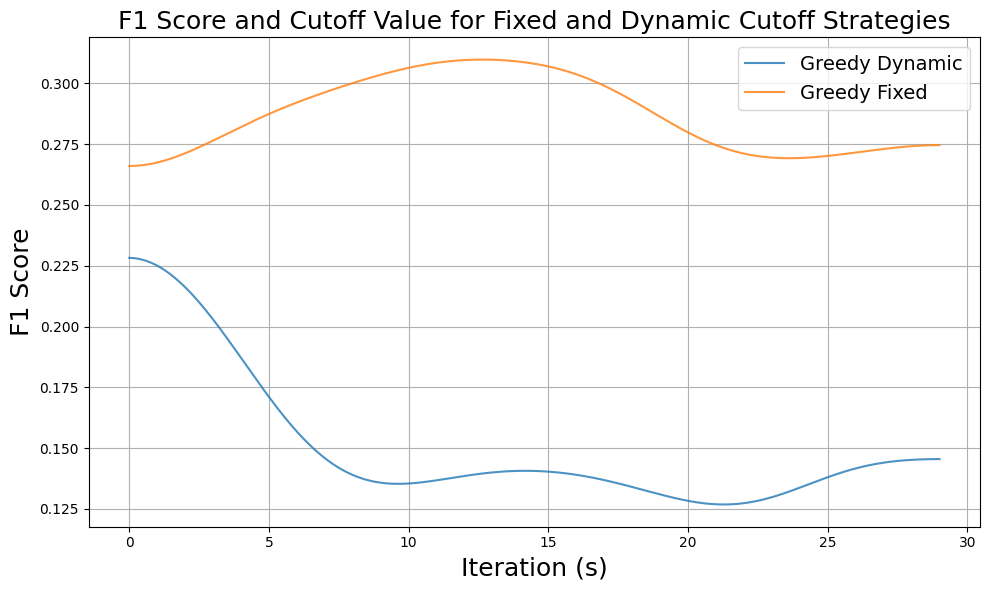

In [30]:

# Handle shorter steps for 'pu7hy1h0' (only 26 steps)

run_ids = {
    "bcm0v53e": ['twilight-dew-1422', 'Greedy Dynamic'],
    "su1yw5qj": ['twilight-dew-1422', 'Greedy Fixed'],
}

rewards = []
steps = []
labels = []
history = None

for run_id, metadata in run_ids.items():
    run = api.run(f"{username}/{project_name}/{run_id}")
    history = run.history()
    
    steps.append(history["_step"].values)  # Full steps for other runs
    rewards.append(history["AprioriTest_F1"].values)

    labels.append(metadata[1])  # Add descriptive label (e.g., "Onln", "Offln")

# Smoothing function
def smooth_data(data, sigma=20):
    """Smooths data using a Gaussian filter."""
    return gaussian_filter1d(data, sigma=sigma)

# Interpolation function to match 500 steps
def interpolate_steps(steps, rewards, target_steps=500):
    """Interpolates steps and rewards to match a target number of steps."""
    target_steps_values = np.linspace(0, steps.max(), target_steps)
    interpolated_rewards = np.interp(target_steps_values, steps, rewards)
    return target_steps_values, interpolated_rewards

# Apply smoothing, interpolation, and plotting
plt.figure(figsize=(10, 6))

for i in range(len(rewards)):
    if len(steps[i]) < 500:  # If steps are less than 500 (for 'pu7hy1h0')
        # Interpolate the data to match 500 steps
        interpolated_steps, interpolated_rewards = interpolate_steps(np.array(steps[i]), np.array(rewards[i]))
    else:
        interpolated_steps = np.array(steps[i])
        interpolated_rewards = np.array(rewards[i])

    # Apply smoothing
    smoothed_rewards = smooth_data(interpolated_rewards, sigma=50)  # Adjust `sigma` for more/less smoothing
    print(interpolated_steps.shape, smoothed_rewards.shape)
    plt.plot(interpolated_steps, smoothed_rewards, label=f"{labels[i]}", alpha=0.8)

# Customize the plot
plt.title('F1 Score and Cutoff Value for Fixed and Dynamic Cutoff Strategies', fontsize=18)
plt.xlabel('Iteration (s)', fontsize=18)
plt.ylabel('F1 Score', fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
# Optional: Save the plot
plt.savefig('/Users/tsajed/test.png', dpi=350)

plt.show()


1ERR
6IIU
5MZJ
4YAY
4AG8
2ZV2
1T7R
5EK0
1T7R
5EK0
5L2S
6D6T
6D6T
6D6T
6D6T
4F8H
1NYX
1ERR
6IIU
5MZJ
4YAY
4AG8
2ZV2
5EK0
1T7R
1T7R
5EK0
5L2S
6D6T
6D6T
6D6T
6D6T
4F8H
1NYX
Found 12 targets: ['1ERR', '1NYX', '1T7R', '2ZV2', '4AG8', '4F8H', '4YAY', '5EK0', '5L2S', '5MZJ', '6D6T', '6IIU']


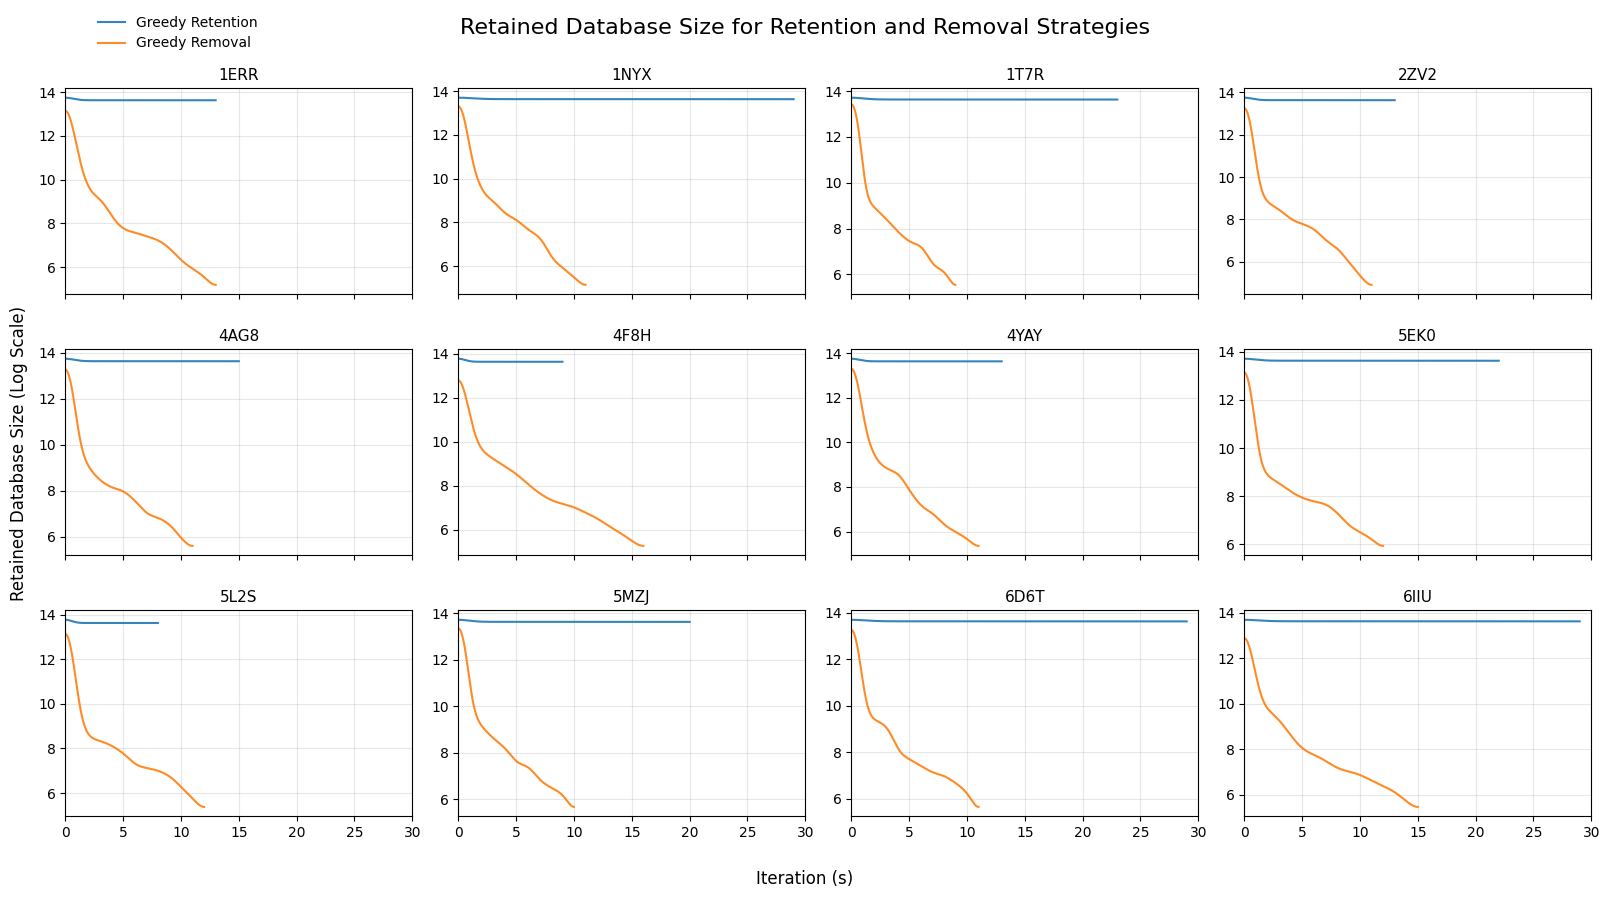

In [79]:
import re
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import wandb

# ------------------ CONFIG ------------------
username = "mohit-pandey-university-of-british-columbia"
project_name = "DDS_AL_2M_AllTgt"
EXPT_NAME = "DDUbench2"
ACQ = "greedy"
F1_KEY = "available_mols"          # change if different
MIN_STEPS = 8                     # only keep runs with > MIN_STEPS
GRID_COLS = 4                      # 4 columns -> 3x4 = 12 targets fits one page
TARGET_LEN = 500                   # interpolation length
SMOOTH_SIGMA = 20
DROP_DB = True
FIGSIZE = (16, 9)
SAVE_PATH = "/Users/tsajed/test.png"
FIXED_CUTOFF = False

api = wandb.Api()

# ------------------ HELPERS ------------------
TARGET_RE = re.compile(r"\b[0-9][A-Za-z0-9]{3}\b")  # e.g., 6iiu, 1t7r, 4yay, 5ek0

def extract_target_from_name(name: str) -> str | None:
    prefix = "advanced_molformer_"
    try:
        after = name.split(prefix, 1)[1]          # part after the prefix
        return after.split("_", 1)[0].upper()     # up to next underscore
    except IndexError:
        return None

def fetch_series(run, key, x_key="_step", max_samples=100000, use_scan_fallback=False):
    # Try sampled history first (fast)
    hist = run.history(keys=[x_key, key], pandas=True, samples=max_samples)

    # If the key was never logged (column missing), bail early
    if key not in hist.columns:
        if use_scan_fallback:
            # optional: try unsampled history for this key
            xs, ys = [], []
            for row in run.scan_history(keys=[x_key, key]):  # full history iterator
                if key in row and x_key in row:
                    xs.append(row[x_key]); ys.append(row[key])
            if xs:
                return np.asarray(xs), np.asarray(ys)
        return None, None

    # If key exists but some rows are NaN, drop them
    hist = hist.dropna(subset=[key])
    if hist.empty:
        return None, None

    return hist[x_key].to_numpy(), hist[key].to_numpy()

def interp_to_common_grid(x, y, target_len=TARGET_LEN):
    xx = np.linspace(x.min(), x.max(), target_len)
    yy = np.interp(xx, x, y)
    return xx, yy

def smooth_data(y, sigma=SMOOTH_SIGMA, log=False, eps=1e-12):
    """
    y: array-like of metric values
    log: if True, apply log transform before smoothing
    eps: small positive offset to avoid log(0)
    """
    y = np.asarray(y, dtype=float)

    if log:
        # Clip to positive and/or offset to avoid -inf from log(0)
        y = np.clip(y, eps, None)         # or: y = np.log1p(np.maximum(y, 0.0))
        y = np.log(y)                      # element-wise log

    ys = gaussian_filter1d(y, sigma=sigma)
    return ys

def auto_grid(n_items, cols=GRID_COLS):
    rows = math.ceil(n_items / cols)
    return rows, cols

# ------------------ QUERY RUNS ------------------
def query_runs(fixed_cutoff: bool):
    return api.runs(
        f"{username}/{project_name}",
        filters={
            "config.threshold_params.fixed_cutoff": FIXED_CUTOFF,
            "config.al_params.acquisition_function": ACQ,
            "config.global_params.expt_name": EXPT_NAME,
            "config.al_params.drop_db": fixed_cutoff
        }
    )

# We’ll fetch both strategies
runs_dynamic = list(query_runs(False))
runs_fixed   = list(query_runs(True))

# ------------------ BUILD {target: {label: run}} ------------------
by_target = {}  # { '6IIU': {'Greedy Dynamic': run, 'Greedy Fixed': run}, ... }

def consider(run, label):
    tgt = extract_target_from_name(run.name or "")
    print(tgt)
    if not tgt:
        return
    # ensure > MIN_STEPS
    x, y = fetch_series(run, F1_KEY)
    if x is None or len(x) <= MIN_STEPS:
        return
    by_target.setdefault(tgt, {})
    # only keep the one with most steps if duplicates exist
    prev = by_target[tgt].get(label)
    if prev is None:
        by_target[tgt][label] = (run, len(x))
    else:
        _, prev_len = prev
        if len(x) > prev_len:
            by_target[tgt][label] = (run, len(x))

for r in runs_dynamic:
    consider(r, "Greedy Retention")
for r in runs_fixed:
    consider(r, "Greedy Removal")


# for r in runs_dynamic:
#     consider(r, "Greedy Dynamic")
# for r in runs_fixed:
#     consider(r, "Greedy Fixed")

# Reduce map to {label: run} (drop counts)
by_target = {t: {lbl: tup[0] for lbl, tup in d.items()} for t, d in by_target.items()}

print(f"Found {len(by_target)} targets:", sorted(by_target.keys()))

# ------------------ PLOT ------------------
def plot_targets_panel(by_target_map, figsize=FIGSIZE, save_path=SAVE_PATH):
    targets = sorted(by_target_map.keys())
    if not targets:
        print("No targets to plot.")
        return

    rows, cols = auto_grid(len(targets), GRID_COLS)
    fig, axes = plt.subplots(rows, cols, figsize=figsize, sharex=True, constrained_layout=True)
    axes = np.atleast_2d(axes)
    ax_list = axes.ravel()

    legend_handles = {}
    for i, tgt in enumerate(targets):
        ax = ax_list[i]
        strat_map = by_target_map[tgt]  # e.g., {'Greedy Dynamic': run, 'Greedy Fixed': run}

        # plot each available strategy
        for label, run in strat_map.items():
            x, y = fetch_series(run, F1_KEY)
            if x is None or len(x) <= MIN_STEPS:
                continue
            xi, yi = interp_to_common_grid(x, y, TARGET_LEN)
            ys = smooth_data(yi, SMOOTH_SIGMA, True)
            [line] = ax.plot(xi, ys, label=label, alpha=0.9)
            legend_handles[label] = line

        ax.set_title(tgt, fontsize=11)
        ax.set_xlim(0, 30)
        ax.grid(True, alpha=0.3)

    # hide unused axes
    for j in range(len(targets), len(ax_list)):
        fig.delaxes(ax_list[j])

    fig.set_constrained_layout_pads(h_pad=0.15, w_pad=0.05)

    fig.suptitle(f"Retained Database Size for Retention and Removal Strategies", fontsize=16)
    fig.supxlabel("Iteration (s)")
    fig.supylabel("Retained Database Size (Log Scale)")

    if legend_handles:
        fig.legend(legend_handles.values(), legend_handles.keys(),
           loc="upper left", ncols=1, frameon=False,
           bbox_to_anchor=(0.05, 1),  # slightly above axes, below top edge
           bbox_transform=fig.transFigure) 

    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()

plot_targets_panel(by_target)


Found 12 targets: ['1ERR', '1NYX', '1T7R', '2ZV2', '4AG8', '4F8H', '4YAY', '5EK0', '5L2S', '5MZJ', '6D6T', '6IIU']


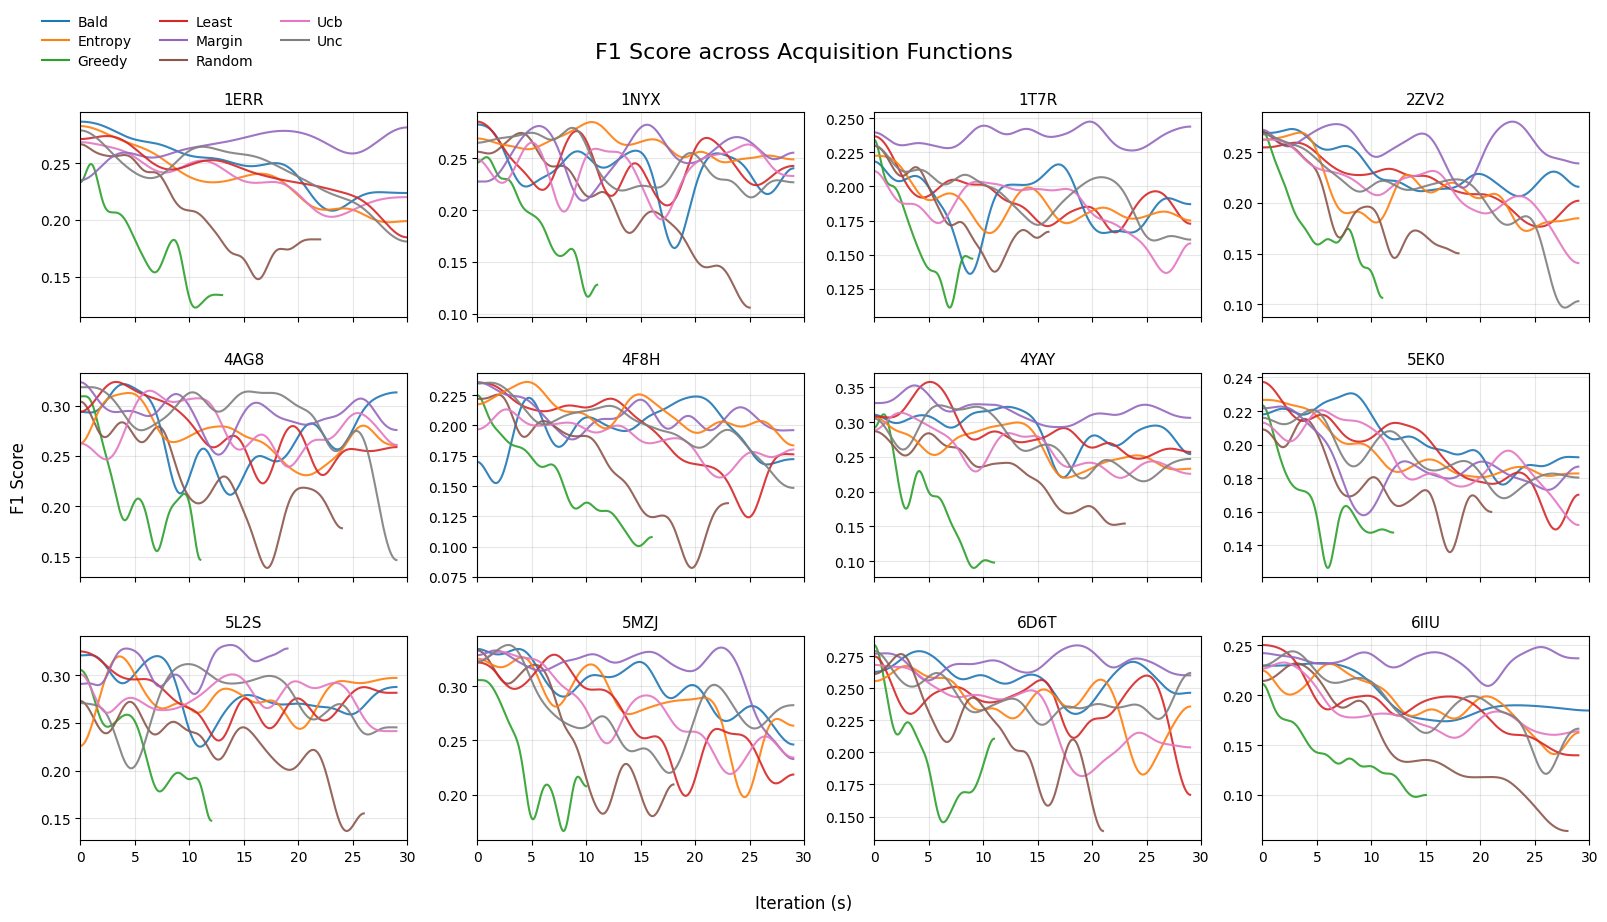

In [86]:
import re
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import wandb

# ------------------ CONFIG ------------------
username = "mohit-pandey-university-of-british-columbia"
project_name = "DDS_AL_2M_AllTgt"
EXPT_NAME = "DDUbench2"
F1_KEY = "AprioriTest_F1"      # y-series to plot
MIN_STEPS = 8                  # only keep runs with > MIN_STEPS
GRID_COLS = 4                  # 4 columns -> 3x4 = 12 targets fits one page
TARGET_LEN = 500               # interpolation length
SMOOTH_SIGMA = 20
FIGSIZE = (16, 9)
SAVE_PATH = "/Users/tsajed/test.png"

# Optional config filters (set to None to ignore)
FIXED_CUTOFF = False            # e.g., True / False / None
DROP_DB = True                 # e.g., True / False / None

# Clip lines after this many iterations (also sets xlim)
MAX_X = 30

api = wandb.Api()

# ------------------ HELPERS ------------------
def extract_target_and_acq(name: str):
    """
    Expect: advanced_molformer_<PDBID>_<ACQ>_...
    Returns (TARGET, ACQ) or (None, None) if not parseable.
    """
    prefix = "advanced_molformer_"
    try:
        after = name.split(prefix, 1)[1]
        pdbid, rest = after.split("_", 1)
        acq = rest.split("_", 1)[0]
        return pdbid.upper(), acq.lower()
    except Exception:
        return None, None

def fetch_series(run, key, x_key="_step", max_samples=100000, use_scan_fallback=False):
    hist = run.history(keys=[x_key, key], pandas=True, samples=max_samples)
    if key not in hist.columns:
        if use_scan_fallback:
            xs, ys = [], []
            for row in run.scan_history(keys=[x_key, key]):
                if key in row and x_key in row:
                    xs.append(row[x_key]); ys.append(row[key])
            if xs:
                return np.asarray(xs), np.asarray(ys)
        return None, None
    hist = hist.dropna(subset=[key])
    if hist.empty:
        return None, None
    return hist[x_key].to_numpy(), hist[key].to_numpy()

def interp_to_common_grid(x, y, target_len=TARGET_LEN):
    xx = np.linspace(x.min(), x.max(), target_len)
    yy = np.interp(xx, x, y)
    return xx, yy

def smooth_data(y, sigma=SMOOTH_SIGMA, log=False, eps=1e-12):
    y = np.asarray(y, dtype=float)
    if log:
        y = np.clip(y, eps, None)
        y = np.log(y)
    return gaussian_filter1d(y, sigma=sigma)

def auto_grid(n_items, cols=GRID_COLS):
    rows = math.ceil(n_items / cols)
    return rows, cols

def nice_label(acq: str) -> str:
    # Tidy acquisition labels for the legend
    return acq.replace("-", " ").replace("_", " ").title()

# ------------------ QUERY RUNS (no acq filter) ------------------
def query_runs():
    filters = {
        "config.global_params.expt_name": EXPT_NAME,
    }
    if FIXED_CUTOFF is not None:
        filters["config.threshold_params.fixed_cutoff"] = FIXED_CUTOFF
    if DROP_DB is not None:
        filters["config.al_params.drop_db"] = DROP_DB

    return list(api.runs(f"{username}/{project_name}", filters=filters))

runs_all = query_runs()

# ------------------ BUILD {target: {acq: run}} ------------------
# Keep the run with the most steps per (target, acq)
by_target = {}  # { '6IIU': {'greedy': run, 'bald': run, ...}, ... }

def consider(run):
    tgt, acq = extract_target_and_acq(run.name or "")
    if not tgt or not acq:
        return
    x, y = fetch_series(run, F1_KEY)
    if x is None or len(x) <= MIN_STEPS:
        return
    by_target.setdefault(tgt, {})
    prev = by_target[tgt].get(acq)
    if prev is None:
        by_target[tgt][acq] = (run, len(x))
    else:
        _, prev_len = prev
        if len(x) > prev_len:
            by_target[tgt][acq] = (run, len(x))

for r in runs_all:
    consider(r)

# Reduce to {acq: run} (drop counts)
by_target = {t: {acq: tup[0] for acq, tup in d.items()} for t, d in by_target.items()}

print(f"Found {len(by_target)} targets:", sorted(by_target.keys()))

# ------------------ PLOT ------------------
from matplotlib.lines import Line2D

def plot_targets_panel(by_target_map, figsize=FIGSIZE, save_path=SAVE_PATH):
    targets = sorted(by_target_map.keys())
    if not targets:
        print("No targets to plot.")
        return

    # Build a stable style map for all acquisitions (consistent colors across subplots)
    all_acq_labels = sorted({nice_label(acq) for t in by_target_map for acq in by_target_map[t].keys()})
    palette = plt.rcParams['axes.prop_cycle'].by_key()['color']
    acq_style = {lbl: dict(color=palette[i % len(palette)], linestyle='-') for i, lbl in enumerate(all_acq_labels)}

    rows, cols = auto_grid(len(targets), GRID_COLS)
    fig, axes = plt.subplots(rows, cols, figsize=figsize, sharex=True, layout="constrained")
    axes = np.atleast_2d(axes)
    ax_list = axes.ravel()

    # legend handles built explicitly (so legend never depends on first/last plotted line)
    legend_handles = {}

    for i, tgt in enumerate(targets):
        ax = ax_list[i]
        strat_map = by_target_map[tgt]  # e.g., {'greedy': run, 'bald': run, ...}

        for acq, run in strat_map.items():
            x, y = fetch_series(run, F1_KEY)
            if x is None or len(x) <= MIN_STEPS:
                continue

            xi, yi = interp_to_common_grid(x, y, TARGET_LEN)

            # clip to MAX_X so nothing is drawn past it
            m = xi <= MAX_X
            xi = xi[m]; yi = yi[m]
            if len(xi) == 0:
                continue

            ys = smooth_data(yi, SMOOTH_SIGMA)

            lbl = nice_label(acq)
            style = acq_style.get(lbl, {})  # fallback empty dict if unseen (shouldn't happen)
            [line] = ax.plot(xi, ys, label=lbl, alpha=0.9, **style)

            # create one custom handle per acquisition label (don’t overwrite)
            if lbl not in legend_handles:
                legend_handles[lbl] = Line2D([0], [0], **style)

        ax.set_title(tgt, fontsize=11)
        ax.set_xlim(0, MAX_X)
        ax.grid(True, alpha=0.3)

    # hide unused axes
    for j in range(len(targets), len(ax_list)):
        fig.delaxes(ax_list[j])

    # layout padding
    fig.set_constrained_layout_pads(h_pad=0.15, w_pad=0.06)

    # titles / labels
    fig.suptitle("F1 Score across Acquisition Functions", fontsize=16)
    fig.supxlabel("Iteration (s)")
    fig.supylabel("F1 Score")

    # figure-level legend with all acquisition functions (use ncol, not ncols)
    if legend_handles:
        labels_sorted = sorted(legend_handles.keys())
        handles_sorted = [legend_handles[l] for l in labels_sorted]
        fig.legend(
            handles_sorted, labels_sorted,
            loc="upper left",
            ncol=3,
            frameon=False,
            bbox_to_anchor=(0.02, 1.02),
            bbox_transform=fig.transFigure,
            labelspacing=0.4,
            handletextpad=0.6,
            borderaxespad=0.0,
        )

    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()


plot_targets_panel(by_target)
